In [50]:
import numpy as np
import matplotlib.pyplot as plt
import spams
import cv2
from global_config import *
import utils

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


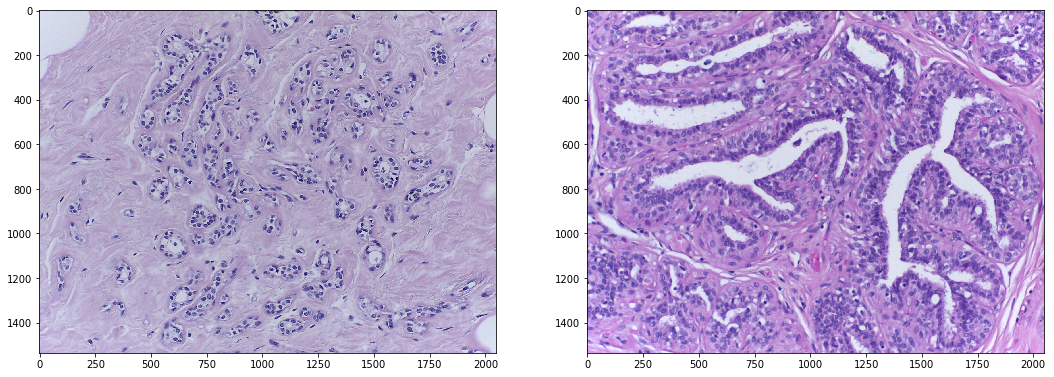

In [66]:
source_image = utils.read_image(source_path)
target_image = utils.read_image(target_path)
plt.rcParams['figure.figsize'] = (18.0, 9.0)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(source_image)
plt.subplot(1, 2, 2)
plt.imshow(target_image)
plt.show()